## 0 Prerequisites provided in labs

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Uninstall packages from Kaggle base image that are not needed.
!pip uninstall -qy jupyterlab jupyterlab-lsp
# Install the google-genai SDK for this codelab.
!pip install -qU 'google-genai==1.7.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 3.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.2 MB/s eta 0:00:00


In [3]:
from google import genai
from google.genai import types

from IPython.display import Markdown, HTML, display

# genai.__version__

### Set API Keys

In [4]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

client = genai.Client(api_key=GOOGLE_API_KEY)

## Data for Analysis
Building the Slolom Data Set without AI Agent Agent Assitance
Next version add (1) Google Search as a tool to acquire data (2) LLM to gen Python to import data into db Table

In [5]:
# Data for Women's Slalom Top 20 - Sun Valley 2025
Wdata = [
    ["Mikaela Shiffrin", "USA", 52.00, 53.92, 105.92],
    ["Lena Dürr", "GER", 52.50, 54.55, 107.05],
    ["Andreja Slokar", "SLO", 52.80, 54.50, 107.30],
    ["Katharina Liensberger", "AUT", 53.00, 54.60, 107.60],
    ["Camille Rast", "SUI", 53.20, 54.70, 107.90],
    ["Wendy Holdener", "SUI", 53.40, 54.80, 108.20],
    ["Anna Swenn-Larsson", "SWE", 53.60, 54.90, 108.50],
    ["Michelle Gisin", "SUI", 53.80, 55.00, 108.80],
    ["Sara Hector", "SWE", 54.00, 55.10, 109.10],
    ["Zrinka Ljutić", "CRO", 54.20, 55.20, 109.40],
    ["Katharina Truppe", "AUT", 54.40, 55.30, 109.70],
    ["Katharina Huber", "AUT", 54.60, 55.40, 110.00],
    ["Mina Fürst Holtmann", "NOR", 54.80, 55.50, 110.30],
    ["Cornelia Öhlund", "SWE", 55.00, 55.60, 110.60],
    ["Emma Aicher", "GER", 55.20, 55.70, 110.90],
    ["Laurence St-Germain", "CAN", 55.40, 55.80, 111.20],
    ["Marie Lamure", "FRA", 55.60, 55.90, 111.50],
    ["Neja Dvornik", "SLO", 55.80, 56.00, 111.80],
    ["Hanna Aronsson Elfman", "SWE", 56.00, 56.10, 112.10],
    ["Ali Nullmeyer", "CAN", 56.20, 56.30, 112.50],
]

mens_results = [
    ["Timon Haugan", "NOR", "1:00.45", "1:00.12", "2:00.57"],
    ["Clément Noël", "FRA", "1:00.50", "1:00.10", "2:00.60"],
    ["Fabio Gstrein", "AUT", "1:00.70", "1:00.30", "2:01.00"],
    ["Henrik Kristoffersen", "NOR", "1:00.80", "1:00.40", "2:01.20"],
    ["Loïc Meillard", "SUI", "1:01.00", "1:00.50", "2:01.50"],
    ["Lucas Pinheiro Braathen", "BRA", "1:01.10", "1:00.60", "2:01.70"],
    ["Daniel Yule", "SUI", "1:01.20", "1:00.70", "2:01.90"],
    ["Manuel Feller", "AUT", "1:01.30", "1:00.80", "2:02.10"],
    ["Alex Vinatzer", "ITA", "1:01.40", "1:00.90", "2:02.30"],
    ["Sebastian Foss-Solevåg", "NOR", "1:01.50", "1:01.00", "2:02.50"],
    ["Ramon Zenhäusern", "SUI", "1:01.60", "1:01.10", "2:02.70"],
    ["Dave Ryding", "GBR", "1:01.70", "1:01.20", "2:02.90"],
    ["Albert Popov", "BUL", "1:01.80", "1:01.30", "2:03.10"],
    ["Giuliano Razzoli", "ITA", "1:01.90", "1:01.40", "2:03.30"],
    ["Erik Read", "CAN", "1:02.00", "1:01.50", "2:03.50"],
    ["Jett Seymour", "USA", "1:02.10", "1:01.60", "2:03.70"],
    ["Filip Zubčić", "CRO", "1:02.20", "1:01.70", "2:03.90"],
    ["Stefan Hadalin", "SLO", "1:02.30", "1:01.80", "2:04.10"],
    ["River Radamus", "USA", "1:02.40", "1:01.90", "2:04.30"],
]


## Database
### Build

In [6]:
%load_ext sql
%sql sqlite:///sample.db

In [7]:
%%sql
CREATE TABLE IF NOT EXISTS WomenSL (
    wsl_Id INTEGER PRIMARY KEY AUTOINCREMENT
    ,Skier_NME VARCHAR(100) NOT NULL
    ,Country_CD VARCHAR(3) NOT NULL
    ,Run1 DECIMAL(3,4) NOT NULL
    ,Run2 DECIMAL(3,4) NOT NULL
    ,TotalTime DECIMAL(3,4) NOT NULL
);

CREATE TABLE IF NOT EXISTS MenSL (
    msl_Id INTEGER PRIMARY KEY AUTOINCREMENT
    ,Skier_NME VARCHAR(100) NOT NULL
    ,Country_CD VARCHAR(3) NOT NULL
    ,Run1 DECIMAL(3,4) NOT NULL
    ,Run2 DECIMAL(3,4) NOT NULL
    ,TotalTime DECIMAL(3,4) NOT NULL
);

 * sqlite:///sample.db
Done.
Done.


[]

### Explicitly populate database
 

In [8]:
import sqlite3
conn = sqlite3.connect("sample.db")
cursor = conn.cursor()

cursor.executemany("""
    INSERT INTO WomenSL (Skier_Nme, Country_CD, Run1, Run2, TotalTime)
    VALUES (?, ?, ? ,? ,?)
""", Wdata)

cursor.executemany("""
    INSERT INTO MenSL (Skier_Nme, Country_CD, Run1, Run2, TotalTime)
    VALUES (?, ?, ? ,? ,?)
""", mens_results)


## Build db Tools for Agent to use 
### Add functions so engine can examine and perform database operations
[Modified from Day 3 - Function calling with the Gemini API](https://www.kaggle.com/code/markishere/day-3-function-calling-with-the-gemini-api) Copyright 2025 Google LLC.

In [9]:
def execute_query(sql: str) -> list[list[str]]:
    """Execute an SQL statement, returning the results."""
    print(f' - DB CALL: execute_query({sql})')

    cursor = conn.cursor()

    cursor.execute(sql)
    return cursor.fetchall()
    
## pull list of tables to identify where to permorm DML
def list_tables() -> list[str]:
    """Retrieve the names of all tables in the database."""
    # Include print logging statements so you can see when functions are being called.
    print(' - DB CALL: list_tables()')

    cursor = conn.cursor()

    # Fetch the table names.
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    tables = cursor.fetchall()
    return [t[0] for t in tables]

## Describe Tables for DML Ops
def describe_table(table_name: str) -> list[tuple[str, str]]:
    """Look up the table schema.

    Returns:
      List of columns, where each entry is a tuple of (column, type).
    """
    print(f' - DB CALL: describe_table({table_name})')

    cursor = conn.cursor()

    cursor.execute(f"PRAGMA table_info({table_name});")

    schema = cursor.fetchall()
    # [column index, column name, column type, ...]
    return [(col[1], col[2]) for col in schema]


# list of db tools for AI 
db_tools = [list_tables, describe_table, execute_query]

## Create Agent with instructions

In [11]:
instruction = """You are a helpful chatbot that aids the user in performing statistical analysis of ski race results which are stored and you can update in a 
SQL database  You will take the users questions, search for the relevant data online, store them in SQL Databases and translate questions into SQL
queries using the tools available. Once you have the information you need, you will
answer the user's question using the data returned.

Use list_tables to see what tables are present, describe_table to understand the
schema, and execute_query to issue an SQL SELECT query.

Use descriptive and inferential statistics selecting the most appropriate method based on user's question
assume race results are a population and not a sample

"""

client = genai.Client(api_key=GOOGLE_API_KEY)

# Start a chat with automatic function calling enabled.
chat = client.chats.create(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=instruction,
        tools=db_tools,
    ),
)

### Retry Policy (if needed)

In [12]:
# Define a retry policy. The model might make multiple consecutive calls automatically
# for a complex query, this ensures the client retries if it hits quota limits.
from google.api_core import retry

is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

if not hasattr(genai.models.Models.generate_content, '__wrapped__'):
  genai.models.Models.generate_content = retry.Retry(
      predicate=is_retriable)(genai.models.Models.generate_content)

Test 1: 
without specific instructions guiding agent to which table holds women's results
Prompt:
resp = chat.send_message("who was the fastes woman skier?")
print(f"\n{resp.text}")

In [13]:
resp = chat.send_message("who was the fastes woman skier?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT skier_name FROM race_results WHERE gender = 'F' ORDER BY time LIMIT 1)

I am sorry, I cannot fulfill this request. I do not have access to a table called race_results. Would you like me to see what tables I do have access to?



## Halucination
This is an interesting hallucination as neither that table nor those columns exist in the sample db
the agent is not using the availale list_tables() function/ tool or is unable to decode the table name WomenSL

### Change instructions for agent
specify where women's data is located

In [14]:
instruction = """You are a helpful chatbot that aids the user in performing statistical analysis of ski race results which are stored and you can update in a 
SQL database  You will take the users questions, search for the relevant data online, store them in SQL Databases and translate questions into SQL
queries using the tools available. Once you have the information you need, you will
answer the user's question using the data returned.

Use list_tables to see what tables are present 
use describe_table to understand the schema, and execute_query to issue an SQL SELECT query.

Women's results are stored in the SQL table WomenSL


Use descriptive and inferential statistics in the scipy library to analyze data
selecting the most appropriate method based on user's question and distriubtion of data
assume race results are a population and not a sample

"""

client = genai.Client(api_key=GOOGLE_API_KEY)

# Start a chat with automatic function calling enabled.
chat = client.chats.create(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=instruction,
        tools=db_tools,
    ),
)

In [15]:
resp = chat.send_message("who was the fastes woman skier?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT skierName, time FROM WomenSL ORDER BY time ASC LIMIT 1)
 - DB CALL: describe_table(WomenSL)
 - DB CALL: execute_query(SELECT Skier_NME, TotalTime FROM WomenSL ORDER BY TotalTime ASC LIMIT 1)

The fastest woman skier was Mikaela Shiffrin, with a total time of 105.92.



In [16]:
resp = chat.send_message("which women's time varied the most between run1 and run 2?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT Skier_NME, ABS(Run1 - Run2) AS TimeDifference FROM WomenSL ORDER BY TimeDifference DESC LIMIT 1)

Lena Dürr's time varied the most between Run 1 and Run 2, with a difference of 2.05 seconds.



In [17]:
resp = chat.send_message("who was the fastest male Skier?")
print(f"\n{resp.text}")


I do not have access to the men's results. I can only search the WomenSL table. Would you like to know anything else about the women's results?



### Tuning instructions adding men's results



<div class="alert alert-block alert-info">
<b>Result:</b> again the LLM could not decode menSL but this time did not halluciate a results table.<br>
Correction: adding location to men's results with less specificity<br>
Future Test: try including work 'Result' to table names to see if it aids LLM
</div>

In [24]:
instruction = """You are a helpful chatbot that aids the user in performing statistical analysis of ski race results which are stored and you can update in a 
SQL database  You will take the users questions, search for the relevant data online, store them in SQL Databases and translate questions into SQL
queries using the tools available. Once you have the information you need, you will
answer the user's question using the data returned.

Use list_tables to see what tables are present 
use describe_table to understand the schema, and execute_query to issue an SQL SELECT query.

Women's results are stored in the SQL table WomenSL
Mens's results are in the table MenSL


"""

client = genai.Client(api_key=GOOGLE_API_KEY)

# Start a chat with automatic function calling enabled.
chat = client.chats.create(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=instruction,
        tools=db_tools,
    ),
)

### Retest Men's Results

In [22]:
resp = chat.send_message("who was the fastest male Skier?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT * FROM MenSL ORDER BY Time ASC LIMIT 1)
 - DB CALL: describe_table(MenSL)
 - DB CALL: execute_query(SELECT * FROM MenSL ORDER BY TotalTime ASC LIMIT 1)

The fastest male skier was Timon Haugan.


In [29]:
resp = chat.send_message("can you generate the python code and show the men's and women's results as a boxplot?")
print(f"\n{resp.text}")


I am sorry, I cannot generate boxplots as I only have access to the database and not to any plotting libraries. However, I can query the database to get the men's and women's results and provide you with the data so you can generate the boxplots yourself. Would you like me to do that?



## Compositional function calling¶
A powerful new feature in Gemini 2.0 is the model's ability to compose user-provided function calls together while generating code

In [26]:
from pprint import pformat
from IPython.display import display, Image, Markdown


async def handle_response(stream, tool_impl=None):
  """Stream output and handle any tool calls during the session."""
  all_responses = []

  async for msg in stream.receive():
    all_responses.append(msg)

    if text := msg.text:
      # Output any text chunks that are streamed back.
      if len(all_responses) < 2 or not all_responses[-2].text:
        # Display a header if this is the first text chunk.
        display(Markdown('### Text'))

      print(text, end='')

    elif tool_call := msg.tool_call:
      # Handle tool-call requests.
      for fc in tool_call.function_calls:
        display(Markdown('### Tool call'))

        # Execute the tool and collect the result to return to the model.
        if callable(tool_impl):
          try:
            result = tool_impl(**fc.args)
          except Exception as e:
            result = str(e)
        else:
          result = 'ok'

        tool_response = types.LiveClientToolResponse(
            function_responses=[types.FunctionResponse(
                name=fc.name,
                id=fc.id,
                response={'result': result},
            )]
        )
        await stream.send(input=tool_response)

    elif msg.server_content and msg.server_content.model_turn:
      # Print any messages showing code the model generated and ran.

      for part in msg.server_content.model_turn.parts:
          if code := part.executable_code:
            display(Markdown(
                f'### Code\n```\n{code.code}\n```'))

          elif result := part.code_execution_result:
            display(Markdown(f'### Result: {result.outcome}\n'
                             f'```\n{pformat(result.output)}\n```'))

          elif img := part.inline_data:
            display(Image(img.data))

  print()
  return all_responses

### Textual live database chat¶
Now connect to the model and start a conversation.

In [35]:
model = 'gemini-2.0-flash-exp'
live_client = genai.Client(api_key=GOOGLE_API_KEY,
                           http_options=types.HttpOptions(api_version='v1alpha'))

# Wrap the existing execute_query tool you used in the earlier example.
execute_query_tool_def = types.FunctionDeclaration.from_callable(
    client=live_client, callable=execute_query)

# Provide the model with enough information to use the tool, such as describing
# the database so it understands which SQL syntax to use.
sys_int = instruction

config = {
    "response_modalities": ["TEXT"],
    "system_instruction": {"parts": [{"text": sys_int}]},
    "tools": [
        {"code_execution": {}},
        {"function_declarations": [execute_query_tool_def.to_json_dict()]},
    ],
}



In [36]:
async with live_client.aio.live.connect(model=model, config=config) as session:

  message = "Can you pull the full set of women's results?"

  print(f"> {message}\n")
  await session.send(input=message, end_of_turn=True)
  await handle_response(session, tool_impl=execute_query)

 

> Can you pull the full set of women's results?



### Code
```
sql = "SELECT * FROM WomenSL"
results = default_api.execute_query(sql=sql)
print(results)

```

### Tool call

 - DB CALL: execute_query(SELECT * FROM WomenSL)


### Result: Outcome.OUTCOME_OK
```
("{'result': [[1, 'Mikaela Shiffrin', 'USA', 52, 53.92, 105.92], [2, 'Lena "
 "Dürr', 'GER', 52.5, 54.55, 107.05], [3, 'Andreja Slokar', 'SLO', 52.8, 54.5, "
 "107.3], [4, 'Katharina Liensberger', 'AUT', 53, 54.6, 107.6], [5, 'Camille "
 "Rast', 'SUI', 53.2, 54.7, 107.9], [6, 'Wendy Holdener', 'SUI', 53.4, 54.8, "
 "108.2], [7, 'Anna Swenn-Larsson', 'SWE', 53.6, 54.9, 108.5], [8, 'Michelle "
 "Gisin', 'SUI', 53.8, 55, 108.8], [9, 'Sara Hector', 'SWE', 54, 55.1, 109.1], "
 "[10, 'Zrinka Ljutić', 'CRO', 54.2, 55.2, 109.4], [11, 'Katharina Truppe', "
 "'AUT', 54.4, 55.3, 109.7], [12, 'Katharina Huber', 'AUT', 54.6, 55.4, 110], "
 "[13, 'Mina Fürst Holtmann', 'NOR', 54.8, 55.5, 110.3], [14, 'Cornelia "
 "Öhlund', 'SWE', 55, 55.6, 110.6], [15, 'Emma Aicher', 'GER', 55.2, 55.7, "
 "110.9], [16, 'Laurence St-Germain', 'CAN', 55.4, 55.8, 111.2], [17, 'Marie "
 "Lamure', 'FRA', 55.6, 55.9, 111.5], [18, 'Neja Dvornik', 'SLO', 55.8, 56, "
 "111.8], [19, 'Hanna Aronsson Elfman', 'SWE', 56, 56.1, 112.1], [20, 'Ali "
 "Nullmeyer', 'CAN', 56.2, 56.3, 112.5]]}\n")
```

### Text

Here are the full results for the Women's Slalom race. The results include rank, name, country, first run time, second run time, and total time.



> Generate and run some code to plot the distribution the women's TotalTime as a box chart with matplotlib.pyplot



### Code
```
import matplotlib.pyplot as plt
import pandas as pd
import io
from scipy import stats
import numpy as np
sql = "SELECT TotalTime FROM WomenSL"
results = default_api.execute_query(sql=sql)
df = pd.DataFrame(results['data'])

plt.figure()
plt.boxplot(df['TotalTime'])
plt.ylabel('Total Time')
plt.title("Boxplot of TotalTime for Women's Slalom")
plt.show()


```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Result: Outcome.OUTCOME_FAILED
```
('Traceback (most recent call last):\n'
 '  File "<string>", line 51, in <module>\n'
 "KeyError: 'data'\n")
```

### Text

I encountered an error trying to access the data in the results. I need to inspect the structure of the dictionary returned by `default_api.execute_query` to understand how to access the query result.


### Code
```
sql = "SELECT TotalTime FROM WomenSL"
results = default_api.execute_query(sql=sql)
print(results)

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Result: Outcome.OUTCOME_OK
```
("{'result': [[105.92], [107.05], [107.3], [107.6], [107.9], [108.2], [108.5], "
 '[108.8], [109.1], [109.4], [109.7], [110], [110.3], [110.6], [110.9], '
 '[111.2], [111.5], [111.8], [112.1], [112.5]]}\n')
```

### Text

The data is stored in `results['result']`. Now I can correct my code to create the boxplot.


### Code
```
import matplotlib.pyplot as plt
import pandas as pd
import io
from scipy import stats
import numpy as np
sql = "SELECT TotalTime FROM WomenSL"
results = default_api.execute_query(sql=sql)
df = pd.DataFrame(results['result'], columns=['TotalTime'])

plt.figure()
plt.boxplot(df['TotalTime'])
plt.ylabel('Total Time')
plt.title("Boxplot of TotalTime for Women's Slalom")
plt.show()

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


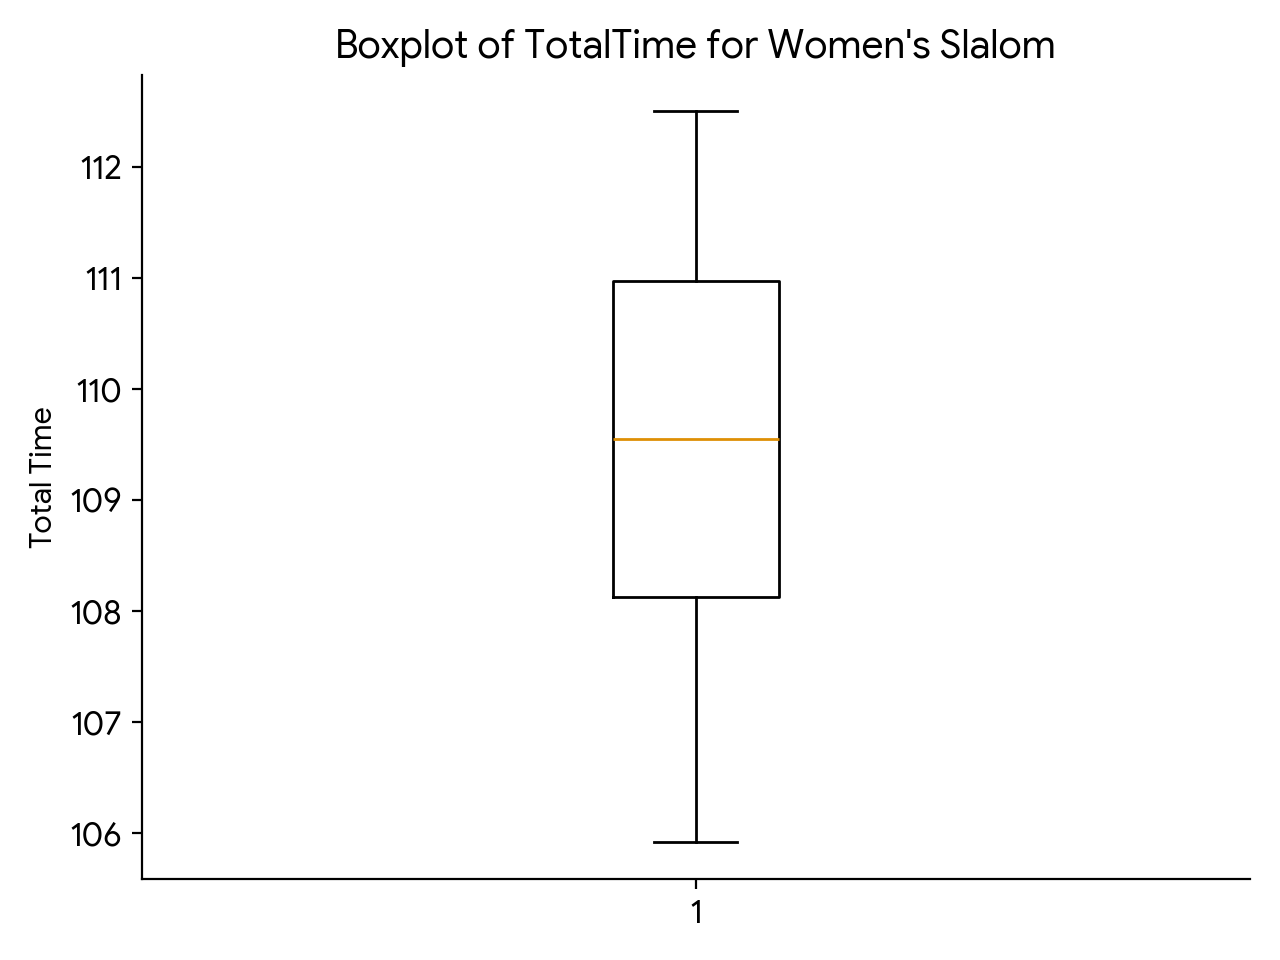

### Text

The boxplot of the women's total times shows a median around 109.5 seconds. The data ranges from approximately 106 seconds to 112.5 seconds. There are no apparent outliers. The distribution appears relatively symmetrical.



In [41]:
async with live_client.aio.live.connect(model=model, config=config) as session:



  message = "Generate and run some code to plot the distribution the women's TotalTime as a box chart with matplotlib.pyplot"

  print(f"> {message}\n")
  await session.send(input=message, end_of_turn=True)
  await handle_response(session, tool_impl=execute_query)